In [1]:
from numpy.linalg import inv
from numpy import log
import numpy as np

import matplotlib.pyplot as plt

from multivariate_util import *

In [2]:
def log_likelihood():
    n  = len(X)
    u_ = [(_-mu).T.dot(inv(cov).dot(_-mu)) for _ in X]
    return -.5*n*p*log(2 * np.pi) -.5*n*log(np.linalg.det(cov)) - .5 * sum(u_)

## Expectation Maximization with Known degrees of freedom
### Generating a sample

In [3]:
mu  = [0,0]
cov = [[1,0], [0,1]]
df  = 10

In [4]:
size = 300

In [5]:
X = multivariate_t_rvs(m=mu, S=cov, df=df, n=size)

### Plotting the sample

In [6]:
x, y = np.mgrid[-3:3:.1, -3:3:.1]
xy = np.column_stack([x.ravel(),y.ravel()])
xy.shape

t = multivariate_t(mu, cov, df)

z = []
for _ in xy:
    z.append(t.pdf(_))
z = np.reshape(z, x.shape)

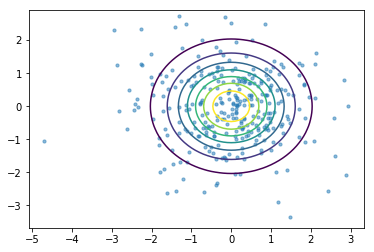

In [7]:
plt.scatter(X.T[0], X.T[1], s=10, alpha=.5)
plt.contour(x, y, z)
plt.show()

### Estimating parameters

In [8]:
# guesses
mu = [.5, 1]
cov = [[.5,0],[0,1.5]]
# known variables
df = 10
p = 2

mu: [ 0.01975157 -0.04165135]
cov: [[ 1.05576444 -0.03485003]
 [-0.03485003  0.92592019]]


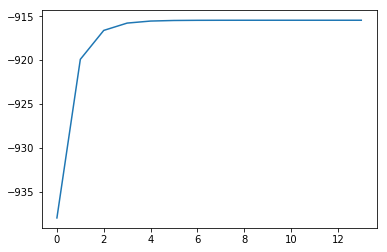

In [9]:
likelihood = []
for z in range(200):
    # E-Step
    u = []
    for delta in X-mu:
        u.append(delta.dot(inv(cov)).dot(delta))
    u = np.array(u)
    tau = (df + p)/(df + u); tau = tau.reshape(-1, 1)
    tau_sum = tau.sum()

    # M-Step
    mu_  = (tau * X).sum(axis=0) / tau_sum
    cov_ = np.array([[0,0], [0,0]], dtype=np.float32)
    for idx, delta in enumerate(X - mu_):
        delta = delta.reshape(-1, 1)
        cov_ += (tau[idx]*delta).dot(delta.T)
    cov_ /= len(tau)

    mu  = mu_
    cov = cov_

    likelihood.append(log_likelihood())
    if len(likelihood) > 1 and likelihood[-1] - likelihood[-2] <= 1e-10:
        break

print 'mu: %s' % mu
print 'cov: %s' % cov
plt.plot(range(len(likelihood)), likelihood)
plt.show()

### Plotting with new parameters

In [10]:
x, y = np.mgrid[-3:3:.1, -3:3:.1]
xy = np.column_stack([x.ravel(),y.ravel()])
xy.shape

t_old = t
t = multivariate_t(mu, cov, df)

z = []
z_old = []
for _ in xy:
    z.append(t.pdf(_))
    z_old.append(t_old.pdf(_))
z = np.reshape(z, x.shape)
z_old = np.reshape(z_old, x.shape)

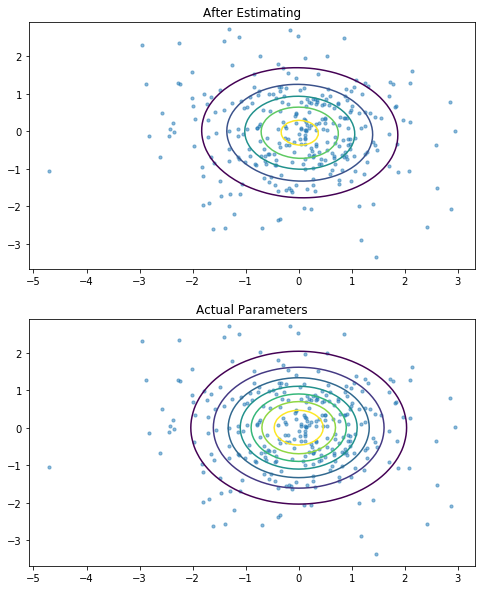

In [11]:
plt.figure(figsize=(8, 10))

plt.subplot(211)
plt.title('After Estimating')
plt.scatter(X.T[0], X.T[1], s=10, alpha=.5)
plt.contour(x, y, z)

plt.subplot(212)
plt.title('Actual Parameters')
plt.scatter(X.T[0], X.T[1], s=10, alpha=.5)
plt.contour(x, y, z_old)


plt.show()